In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colorset = sns.color_palette('Paired', 8)
sns.set()

In [2]:
data = pd.read_csv("movies.csv", engine='python')

In [3]:
data.head(n=10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [4]:
len(data)

6820

In [5]:
print(data.company.unique(), len(data.company.unique()))

['Columbia Pictures Corporation' 'Paramount Pictures'
 'Twentieth Century Fox Film Corporation' ... 'Anna Biller Productions'
 'Siempre Viva Productions' 'Borderline Presents'] 2179


In [6]:
print(data.country.unique(), len(data.country.unique()))

['USA' 'UK' 'Australia' 'Italy' 'France' 'Sweden' 'Japan' 'Spain'
 'Switzerland' 'Canada' 'Israel' 'Netherlands' 'Argentina' 'Denmark'
 'West Germany' 'Hong Kong' 'Belgium' 'Ireland' 'South Africa' 'Hungary'
 'Iran' 'New Zealand' 'Germany' 'China' 'Peru' 'Soviet Union' 'Mexico'
 'Brazil' 'Taiwan' 'India' 'Austria' 'Portugal' 'Cuba'
 'Republic of Macedonia' 'Russia' 'Greece' 'Norway' 'Romania' 'Jamaica'
 'Federal Republic of Yugoslavia' 'Aruba' 'Czech Republic' 'South Korea'
 'Finland' 'Thailand' 'Colombia' 'Palestine' 'Indonesia' 'Saudi Arabia'
 'Chile' 'Poland' 'Kenya' 'Bahamas' 'Ukraine' 'Iceland' 'Malta' 'Panama'] 57


In [7]:
print(data.director.unique(), len(data.director.unique()))

['Rob Reiner' 'John Hughes' 'Tony Scott' ... 'Sam Liu' 'Nicolas Pesce'
 'Nicole Garcia'] 2759


In [8]:
print(data.genre.unique(), len(data.genre.unique()))

['Adventure' 'Comedy' 'Action' 'Drama' 'Crime' 'Thriller' 'Horror'
 'Animation' 'Biography' 'Sci-Fi' 'Musical' 'Family' 'Fantasy' 'Mystery'
 'War' 'Romance' 'Western'] 17


In [9]:
print(data.star.unique(), len(data.star.unique()))

['Wil Wheaton' 'Matthew Broderick' 'Tom Cruise' ... 'Samantha Robinson'
 'Jennifer Saunders' 'Kika Magalh�es'] 2504


In [10]:
print(data.writer.unique(), len(data.writer.unique()))

['Stephen King' 'John Hughes' 'Jim Cash' ... 'Brian Azzarello'
 'Nicolas Pesce' 'Milena Agus'] 4199


In [11]:
data[data.budget == data.budget.max()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
4631,300000000.0,Walt Disney Pictures,USA,Gore Verbinski,Action,309420425.0,Pirates of the Caribbean: At World's End,PG-13,2007-05-25,169,7.1,Johnny Depp,514191,Ted Elliott,2007


In [12]:
data[data.budget == data.budget.min()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
25,0.0,TriStar Pictures,USA,John Badham,Comedy,40697761.0,Short Circuit,PG,1986-05-09,98,6.6,Ally Sheedy,47068,S.S. Wilson,1986
26,0.0,Neue Constantin Film,Italy,Jean-Jacques Annaud,Crime,7153487.0,The Name of the Rose,R,1986-09-24,130,7.8,Sean Connery,86991,Umberto Eco,1986
27,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986
32,0.0,Gaumont,France,Jean-Jacques Beineix,Drama,2003822.0,Betty Blue,Not specified,1986-11-07,120,7.4,Jean-Hugues Anglade,14562,Philippe Djian,1986
35,0.0,Columbia Pictures Corporation,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II,PG,1986-06-20,113,5.9,Pat Morita,58370,Robert Mark Kamen,1986
36,0.0,Lorimar Productions,USA,Nick Castle,Drama,7177431.0,The Boy Who Could Fly,PG,1986-09-26,114,6.5,Lucy Deakins,4623,Nick Castle,1986
41,0.0,Universal Pictures,USA,Don Bluth,Animation,47483002.0,An American Tail,G,1986-11-21,80,6.9,Dom DeLuise,41004,Judy Freudberg,1986
48,0.0,Metro-Goldwyn-Mayer (MGM),USA,Peter Hyams,Action,38500726.0,Running Scared,R,1986-06-27,107,6.5,Gregory Hines,9344,Gary DeVore,1986
49,0.0,Hawn / Sylbert Movie Company,USA,Michael Ritchie,Comedy,26285544.0,Wildcats,R,1986-02-14,106,5.9,Goldie Hawn,10239,Ezra Sacks,1986
56,0.0,TaliaFilm II Productions,USA,Hal Needham,Drama,2015882.0,Rad,PG,1986-03-28,91,7.2,Bart Conner,4039,Sam Bernard,1986


Много фильмов с "нулевым" бюджетом, это пропуски

In [13]:
data[data.gross == data.gross.min()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6784,0.0,Magic Lantern,Spain,Carles Torrens,Horror,70.0,Pet,R,2016-12-02,94,5.7,Dominic Monaghan,10504,Jeremy Slater,2016


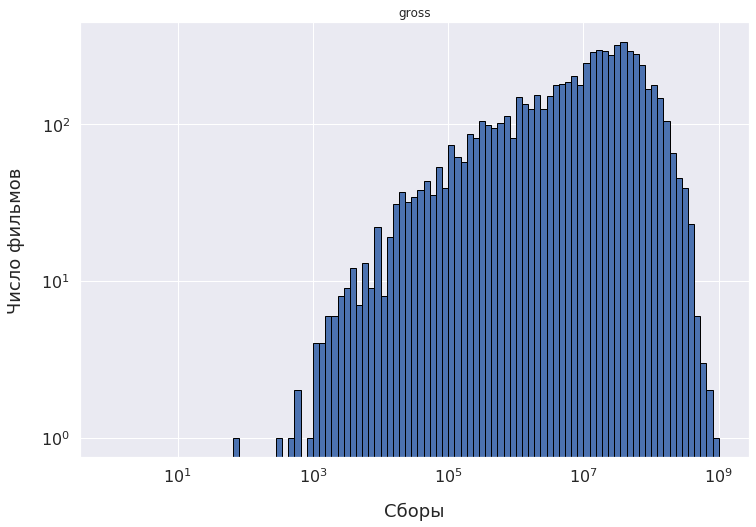

In [14]:
data.hist('gross', figsize=(12, 8), bins=[0] + list(np.logspace(0, 9, num=100)), ec='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Сборы", labelpad=16, size=18)
plt.ylabel("Число фильмов", labelpad=16, size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('gross-stat.png')

In [15]:
data.loc[data.gross.sort_values(ascending=True)[:10].index, ['budget', 'name', 'director', 'gross', 'country']]

,budget,name,director,gross,country
6784,0.0,Pet,Carles Torrens,70.0,Spain
2594,15000000.0,Trojan War,George Huang,309.0,USA
6066,0.0,I Spit on Your Grave 2,Steven R. Monroe,441.0,USA
5699,0.0,The Decoy Bride,Sheree Folkson,542.0,UK
5917,0.0,Into the White,Petter N�ss,547.0,Norway
5242,0.0,Perrier's Bounty,Ian Fitzgibbon,828.0,Ireland
1319,0.0,Samantha,Stephen La Rocque,1076.0,USA
5711,5000000.0,Flypaper,Rob Minkoff,1098.0,Germany
3255,0.0,"Love, Honor and Obey",Dominic Anciano,1143.0,UK
5671,0.0,Chalet Girl,Phil Traill,1201.0,UK


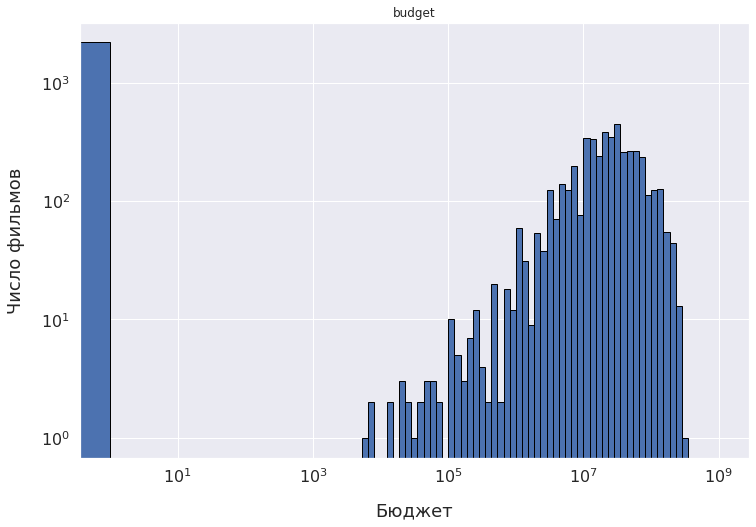

In [16]:
data.hist('budget', figsize=(12, 8), bins=[0] + list(np.logspace(0, 9, num=100)), ec='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Бюджет", labelpad=16, size=18)
plt.ylabel("Число фильмов", labelpad=16, size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('budget-stat.png')

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [22]:
known_budget_films = data[data.budget!=0]

In [23]:
mean_budget_by_year = dict(zip(data.year.unique(), [[] for _ in range(31)]))
for year, budget in zip(list(known_budget_films.year), list(known_budget_films.budget)):
    mean_budget_by_year[year].append(budget)
for year in mean_budget_by_year.keys():
    mean_budget_by_year[year] = sum(mean_budget_by_year[year]) / len(mean_budget_by_year[year])
    
infl = [2.23, 2.25,  2.16, 2.05, 1.96, 1.87, 1.82, 1.77, 1.72, 1.67, 1.63, 1.59, 1.56, 1.53, 1.48, 1.43, 1.42, 1.39, 1.34, 1.31, 1.26, 1.22, 1.16, 1.18, 1.17, 1.13, 1.11, 1.09, 1.08, 1.08, 1.06]
new_mean_budget_by_year = mean_budget_by_year.copy()
for i in range(1986, 2017):
    new_mean_budget_by_year[i] *= infl[i-1986]

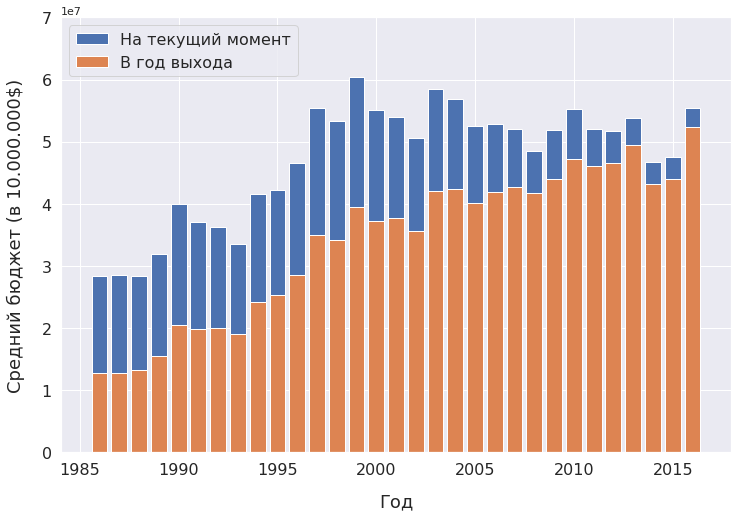

In [24]:
plt.ylim(0,  7* 10**7)
plt.bar(new_mean_budget_by_year.keys(), new_mean_budget_by_year.values())
plt.bar(mean_budget_by_year.keys(), mean_budget_by_year.values())
plt.legend(['На текущий момент', 'В год выхода'], loc='upper left',  prop={'size': 16})#, bbox_to_anchor=(1, 1))

plt.xlabel("Год", labelpad=16, size=18)
plt.ylabel("Средний бюджет (в 10.000.000$)", labelpad=16, size=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('av_budget.png')

In [25]:
ratings_by_year = pd.crosstab(data.year, data.rating)

In [26]:
lst = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'NOT RATED', 'UNRATED', 'Not specified']
ratings_by_year[lst + list(set(data.rating.unique()) ^ set(lst))]

rating,G,PG,PG-13,R,NC-17,NOT RATED,UNRATED,Not specified,TV-14,TV-MA,B,TV-PG,B15
year,,,,,,,,,,,,,
1986,8,53,46,102,1,0,4,6,0,0,0,0,0
1987,5,50,41,117,0,2,0,4,0,0,0,0,0
1988,3,54,35,124,0,1,0,3,0,0,0,0,0
1989,5,38,57,115,2,2,0,2,0,0,0,0,0
1990,6,34,55,118,1,2,1,3,0,0,0,0,0
1991,6,32,48,127,1,2,2,1,0,0,0,1,0
1992,4,31,55,112,3,3,6,6,0,0,0,0,0
1993,6,42,57,102,1,5,3,4,0,0,0,0,0
1994,7,49,58,98,0,5,3,0,0,0,0,0,0


Наиболее частые случаи, кроме пяти стандартных рейтингов - 'UNRATED', 'NOT RATED' и 'Not specified'

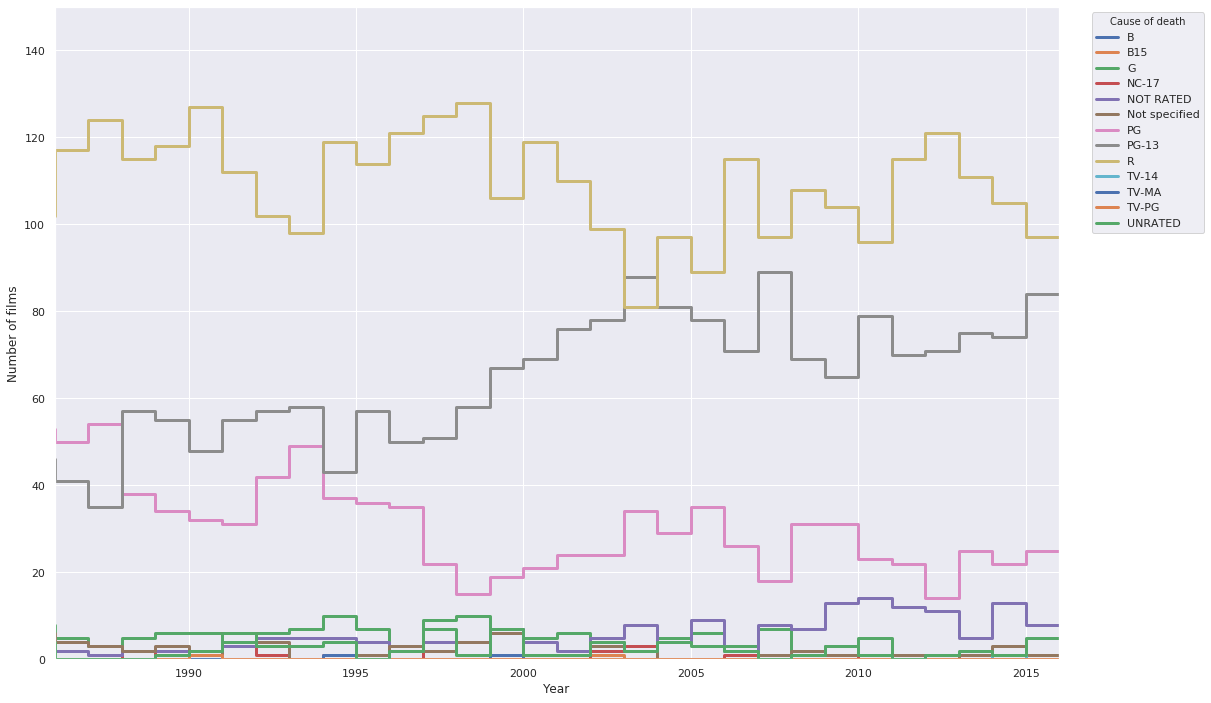

In [27]:
rating_by_year = pd.crosstab(data.year, data.rating)
rating_by_year.plot(lw=3, ds='steps', figsize=(18,12), grid=True)
plt.legend(title="Cause of death", loc='upper right', bbox_to_anchor=(1.15,1))
plt.xlabel("Year")
plt.ylabel("Number of films")
plt.ylim(0,150)
plt.show()

In [28]:
standart_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']
other = list(set(rating_by_year.columns.unique()) ^ set(standart_ratings))

In [29]:
other

['UNRATED',
 'B15',
 'Not specified',
 'NOT RATED',
 'TV-14',
 'TV-MA',
 'B',
 'TV-PG']

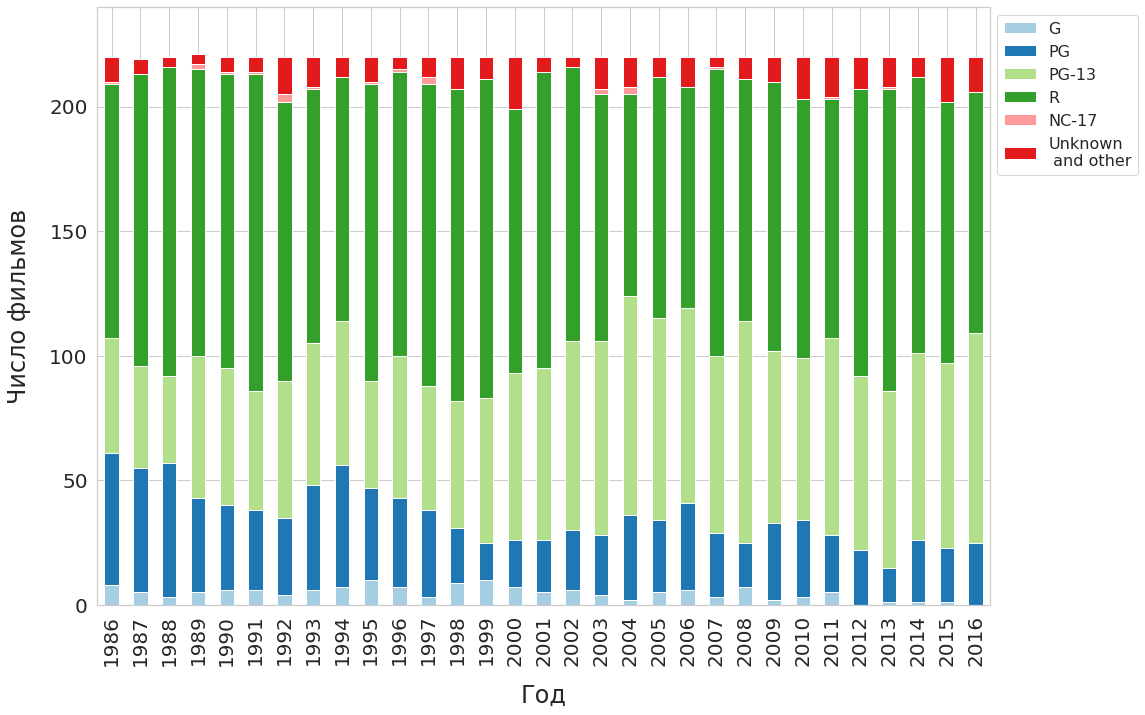

In [30]:
sns.set(style='whitegrid')
rating_by_year['Unknown\n and other'] = rating_by_year[other].sum(axis=1)
rating_by_year[standart_ratings + ['Unknown\n and other']].plot.bar(stacked='True', figsize=(16,11), color=colorset)#(lw=5, ds='steps', figsize=(16,11), grid=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.175,1), prop={'size': 16})
plt.xlabel("Год", labelpad=18, size=24)
plt.ylabel("Число фильмов", labelpad=18, size=24)
plt.ylim(0,240)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('year-rate.png', bbox_inches="tight")
plt.show()

In [31]:
import collections
collections.Counter(data.year)

Counter({1986: 220,
         1987: 219,
         1989: 221,
         1988: 220,
         1990: 220,
         1991: 220,
         1992: 220,
         1993: 220,
         1994: 220,
         1995: 220,
         1996: 220,
         1997: 220,
         1998: 220,
         1999: 220,
         2000: 220,
         2001: 220,
         2002: 220,
         2003: 220,
         2004: 220,
         2005: 220,
         2006: 220,
         2007: 220,
         2008: 220,
         2009: 220,
         2010: 220,
         2011: 220,
         2012: 220,
         2013: 220,
         2014: 220,
         2015: 220,
         2016: 220})

In [32]:
genre_by_year = pd.crosstab(data.year, data.genre)
genre_by_year

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,
1986,49,16,7,7,65,12,46,2,0,10,1,0,0,1,4,0,0
1987,47,9,1,7,79,17,40,0,4,11,0,1,0,1,2,0,0
1988,35,9,5,6,82,14,48,1,3,11,0,1,2,0,1,2,0
1989,46,15,2,11,78,13,40,1,3,10,0,0,0,1,1,0,0
1990,46,11,4,9,71,17,47,2,2,8,0,1,0,1,1,0,0
1991,42,9,5,6,81,15,54,0,0,3,0,3,1,0,1,0,0
1992,37,14,6,11,62,25,54,0,1,7,0,1,1,0,1,0,0
1993,34,12,5,11,65,19,62,1,2,7,0,0,1,0,0,0,1
1994,33,16,5,13,93,17,34,3,2,2,0,1,1,0,0,0,0


In [33]:
lst = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Drama', 'Horror']
other = list(set(genre_by_year.columns.unique()) ^ set(lst))
genre_by_year['Other'] = genre_by_year[other].sum(axis=1)

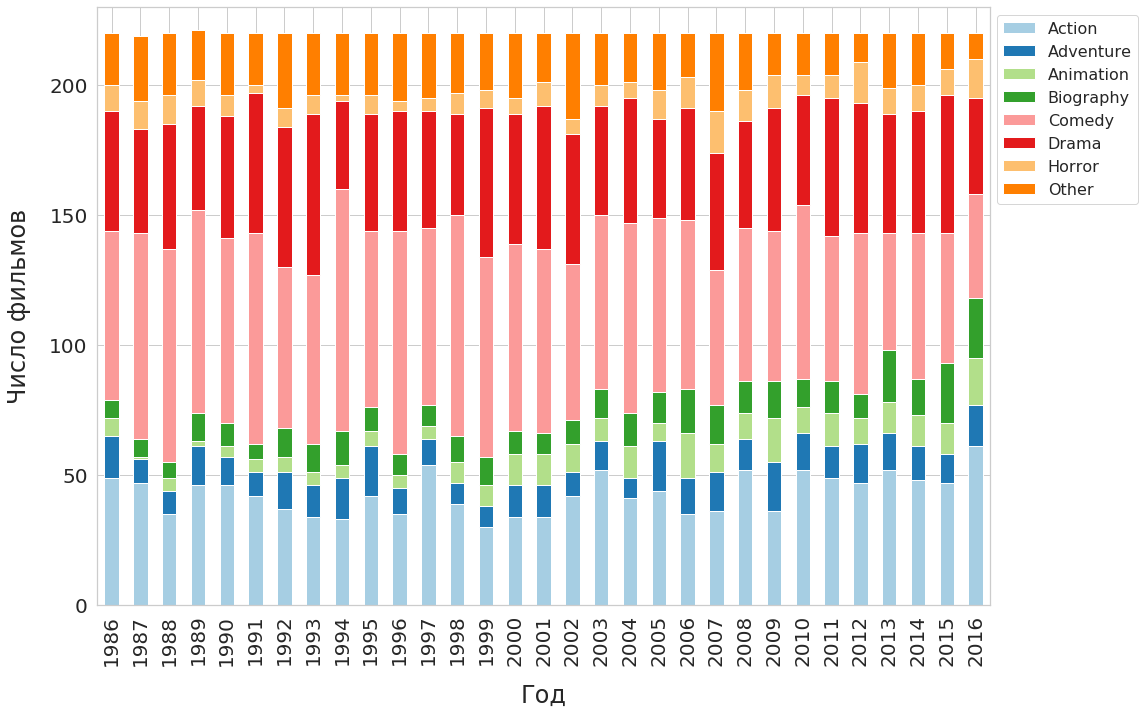

In [34]:
genre_by_year[lst + ['Other']].plot.bar(stacked='True', figsize=(16,11), color=colorset)
plt.legend(loc='upper right', bbox_to_anchor=(1.175,1), prop={'size': 16})
plt.xlabel("Год", labelpad=18, size=24)
plt.ylabel("Число фильмов", labelpad=18, size=24)
plt.ylim(0,230)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('year-genre.png', bbox_inches="tight")
plt.show()